In [6]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Считаываем данные о действиях, которые совершают студенты со стэпами

они хранятся здесь если что: https://stepik.org/media/attachments/course/4852/event_data_train.zip

1) step_id - id стэпа
2) user_id - анонимизированный id юзера
3) timestamp - время наступления события в формате unix date
4) action - событие, возможные значения: 
- discovered - пользователь перешел на стэп
- viewed - просмотр шага,
- started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
- passed - удачное решение практического шага

In [10]:
events_data= pd.read_csv('/Users/tony_builder/tony. Личное/IT/Mashine Learning/event_data_train.csv')
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


Считываем данные  о времени и статусах сабмитов к практическим заданиям

они хранятся здесь если что: https://stepik.org/media/attachments/course/4852/submissions_data_train.zip

1) step_id - id стэпа
2) timestamp - время отправки решения в формате unix date
3) submission_status - статус решения
4) user_id - анонимизированный id юзера


In [66]:
submissions_data = pd.read_csv('/Users/tony_builder/tony. Личное/IT/Mashine Learning/submissions_data_train.csv')

submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


### формат времени - это количество секунд, которые прошли с 1 января 1970 года

полезные ссылки:
1) работа со временем в pandas https://medium.datadriveninvestor.com/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d
2) примеры работы со временем в pandas: https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
3) работа с модулем datetime https://python-scripts.com/datetime-time-python

отвлечемся - немного поработаем со временем на примерах

In [33]:
# узнать текущую дату - код выведет кортеж (год, месяц, день, час, минут, секунд...)
import datetime                 # нужно импортировать модуль datetime
now = datetime.datetime.now()
display(now)
print(now)

# но объект не итерируемый! код ниже выдаст ошибку
# print(tuple(now)[0]) 

# а значит нужно пользоваться встроенными методами:
print(now.year, now.month, now.day, now.hour, now.minute, now.second)   # выведет значение типа int, с которым уже можно работать



datetime.datetime(2023, 2, 17, 12, 7, 53, 134298)

2023-02-17 12:07:53.134298
2023 2 17 12 7 53
2028


pandas.Series.dt.year возвращает год даты и времени. 

pandas.Series.dt.month возвращает месяц даты и времени. 

pandas.Series.dt.day возвращает день даты и времени. 

pandas.Series.dt.hour возвращает час даты и времени. 

pandas.Series.dt.minute возвращает минуту даты и времени.

In [40]:
# разбить дату на отдельные элементы можно так:

rng = pd.DataFrame()
rng['date'] = pd.date_range('1/1/2011', periods = 72, freq ='H')
 
# Print the dates in dd-mm-yy format
rng[:5]

# заодно напомню себе, как можно легко экранировать исключить убрать целый блок кода из выполнения 
"""
# Create features for year, month, day, hour, and minute
rng['year'] = rng['date'].dt.year
rng['month'] = rng['date'].dt.month
rng['day'] = rng['date'].dt.day
rng['hour'] = rng['date'].dt.hour
rng['minute'] = rng['date'].dt.minute  
"""
rng['year'] = rng['date'].dt.year
rng['month'] = rng['date'].dt.month
rng['day'] = rng['date'].dt.day
rng['hour'] = rng['date'].dt.hour
rng['minute'] = rng['date'].dt.minute  

rng

,date,year,month,day,hour,minute
0,2011-01-01 00:00:00,2011,1,1,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0
2,2011-01-01 02:00:00,2011,1,1,2,0
3,2011-01-01 03:00:00,2011,1,1,3,0
4,2011-01-01 04:00:00,2011,1,1,4,0
...,...,...,...,...,...,...
67,2011-01-03 19:00:00,2011,1,3,19,0
68,2011-01-03 20:00:00,2011,1,3,20,0
69,2011-01-03 21:00:00,2011,1,3,21,0
70,2011-01-03 22:00:00,2011,1,3,22,0


добавим колонку с переведенным временем в привычный формат

формат (тип) этих данных - datetime64[ns]

In [14]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data.head()



,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [15]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

можно работать с этими данными о времени

например, найти минимальное (то есть по сути время первого обращения к курсу): 

In [16]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

посмотрим какие уникальные данные вообще встречаются в графе событий:

In [11]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

создадим новую колонку 

In [41]:
events_data['day'] = events_data.date.dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


Теперь посмотрим сколько людей в какой день записалось

для этого сгруппируем по колонке день, и возьмем число уникальных юзеров из колонки user_id

In [42]:
events_data.groupby('day') \
    .user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

неудобно данные в таком виде оценить - строим график

где х - это переменная столбца День (дата)

у - это значение уникальных пользователей 

<AxesSubplot: xlabel='day'>

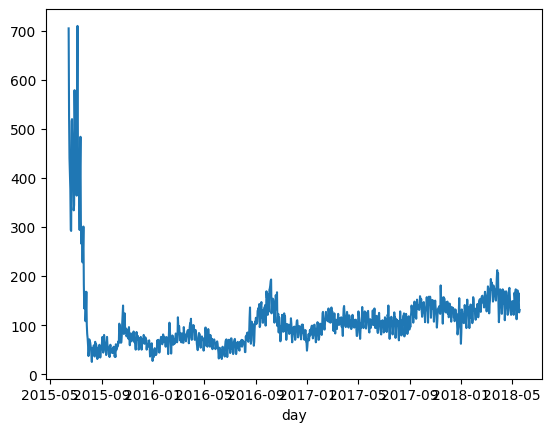

In [43]:
events_data.groupby('day') \
    .user_id.nunique().plot()

настроим размер графика для удобства восприятия

In [44]:
# Надстройка для изменения размера графика
sns.set(rc={'figure.figsize': (9,6)}) 

<AxesSubplot: xlabel='day'>

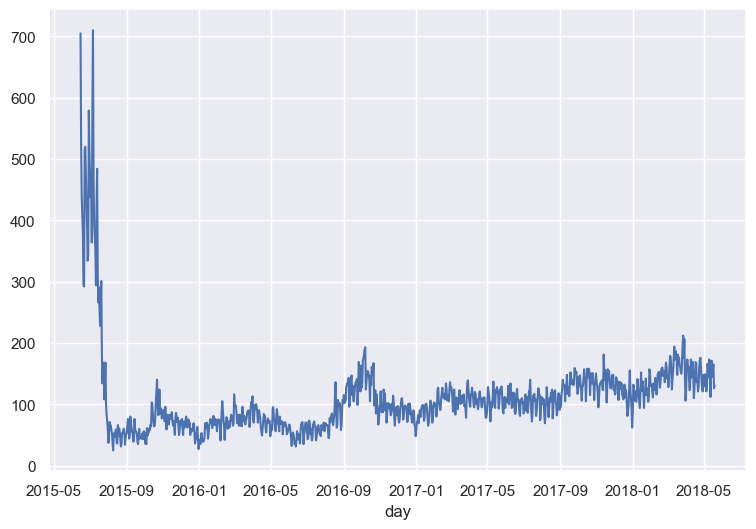

In [45]:
events_data.groupby('day') \
    .user_id.nunique().plot()

Теперь посмотрим кто успешно решал степы и в каком количестве

для этого:
- отфильтруем датасэт по показателю passed в графе action
- сгруппируем датасэт по переменной пользователя (чтобы он посчитал всех уникальных пользователей)
- аггрегируем данные по графе step_id (в данном случае посчитаем количество пройденных степов)
- заменим имя колонки, в которую мы все это собираем (step_id -> passed_step)


In [52]:

events_passed = events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'passed_step'})

events_passed

,user_id,passed_step
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
...,...,...
17257,26789,2
17258,26790,8
17259,26794,69
17260,26797,10


теперь построим гистограмму распределения:
- по оси х здесь будет число сданных степов юзерами
- по оси у - частота появления такого события

<AxesSubplot: >

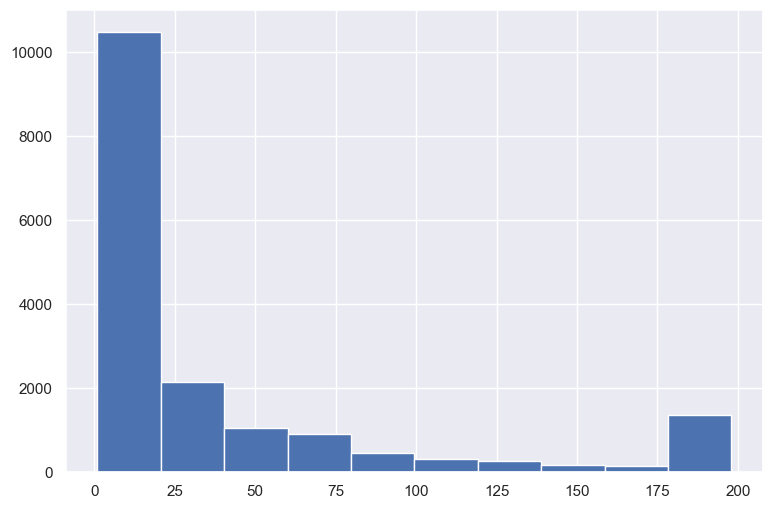

In [54]:
events_passed.passed_step.hist()

In [53]:
events_passed.sort_values(['passed_step'], ascending = False)

,user_id,passed_step
8631,13365,198
16510,25632,198
2995,4546,198
13758,21395,198
10641,16489,198
...,...,...
12116,18806,1
12114,18802,1
12108,18795,1
4395,6733,1


Что мы видим? 

что в нашем аггрегированном датасэте есть значение числа СДАННЫХ (решенных) степов равное 1

это значит, что мы ПОТЕРЯЛИ всех пользователей, которые НЕ РЕШИЛИ НИ ОДНОГО степа.

### вывод: решение неверное.

Что делаем дальше?

воспользуемся ***pivot таблицами***

что она сделает: она перепишет таблицу таким образом, что :
1) нужные нам данные из колонки юзеров станут индексами
2) именами колонок станут названия колонки action (увидел, решил, впервые открыл, первая попытка решения)
3) значениями в колонках станет посчет количества каждого из действий для каждого из юзеров
4) а те позиции, которые окажутся пустыми - заполнит нулями

In [58]:
# включаем 0 в выборку
events_data.pivot_table(index='user_id', 
                        columns='action',                   # здесь назначили имена колонок
                        values='step_id',                   # здесь сообщили откуда взять значения для заполнения
                        aggfunc='count',                    # здесь сказали что делать с этими значениями
                        fill_value=0)\
                            .reset_index().head()           # здесь "сбросили" индексы, заведя их в отдельную колонку 


# чем эта структура удобнее, чем та, что ниже? - доступ к именам колонок (а значит и к значениям) проще и удобнее

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [64]:
# для наглядности уберу сброс индексов, чтобы увидеть как таблица выглядит на выходе


events_uniq = events_data.pivot_table(index='user_id', 
                        columns='action',                   # здесь назначили имена колонок
                        values='step_id',                   # здесь сообщили откуда взять значения для заполнения
                        aggfunc='count',                    # здесь сказали что делать с этими значениями
                        fill_value=0)\
                             

events_uniq.head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


Теперь можно посмотреть на распределение активности пользователей 

(например, по типу discovered - то есть тех, кто впервые открыл некоторый степ)

<AxesSubplot: >

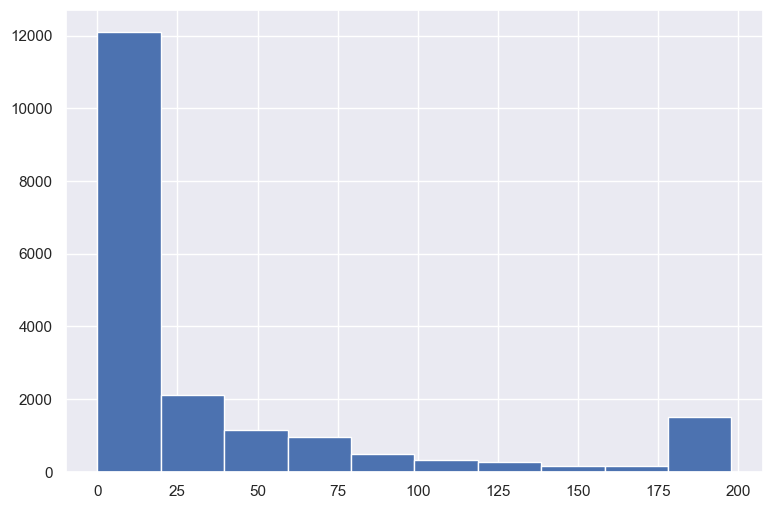

In [65]:
events_uniq.discovered.hist()

### Теперь перейдем к обработке данных из таблицы, хранящей данные о результате решений степов

добавим столбцы по удобоваримой дате

In [67]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


посмотрим сколько за всю историю курса было правильных и неправильных решений каждого степа

разумеется, для каждого пользователя, который решал степы

In [68]:
users_scores = submissions_data.pivot_table(index='user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [69]:
# вспомогательный код только для понимания, как по сути выглядит таблица (верхняя - для удобства работы)

submissions_data.pivot_table(index='user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).head()

submission_status,correct,wrong
user_id,,
2,2,0
3,29,23
5,2,2
8,9,21
14,0,1


### Теперь определим число бросивших курс посредством анализа промежутка времени 
Зачем? зная его  можно утверждать, что студент бросил курс

возьмем только интересующие нас данные: юзер, день, временная метка

In [70]:
events_data[['user_id', 'day', 'timestamp']].head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
1,17632,2015-06-15,1434340848
2,17632,2015-06-15,1434340848
3,17632,2015-06-15,1434340895
4,17632,2015-06-15,1434340895


удалим дубликаты с помощью метода drop_duplicates(), который уберет все строки, содержащие дубликаты

In [71]:
events_data[['user_id', 'day', 'timestamp']].head().drop_duplicates()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
3,17632,2015-06-15,1434340895


уберем дубликаты только для колонок юзер и день

останутся только строчки для каждого юзера со временем когда он был онлайн

In [72]:
# Удаляем дубликаты только по айди и дням
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


для наглядности смотрим как выглядит такой датасэт отсортированный по пользователям: видим, что для каждого пользователя есть множество значений дней и временных меток, когда он был онлайн

In [74]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).sort_values(['user_id']).head()

,user_id,day,timestamp
1347416,1,2016-09-02,1472827464
2874398,2,2017-12-27,1514383364
3073427,2,2018-02-21,1519226966
740499,3,2015-10-11,1444552901
706958,3,2015-09-06,1441533919


Теперь для каждого пользователя мы находим уникальные временные метки, когда он был онлайн:
- для этого отбираем три колонки датасэта (уже делали выше)
- убираем дубликаты (делали выше)
- группируем по пользователям (чтобы в датасэте в колонке Пользователь не повторялся несколько раз)
- и для колонки временной метки применяем метод аппликации (apply) для сбора всех временных меток в некий список

In [73]:
# Для каждого пользователя находим уникальные таймстемпы
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

вспогательный код для понимания - работа функции diff()

для списка работает следующим образом - возвращает массив разниц между соседними элементами списка

In [78]:
print(np.diff([2,9,1,5]))

print(np.diff(sorted([2,9,1,5])))

[ 7 -8  4]
[1 3 4]


Теперь применим эту функцию для расчета разницы между временными меткаим для каждого уникального пользователя:

In [80]:
# Для каждого пользователя находим разницу по времени между его нахождениями на сайте
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
        .apply(np.diff).head(20)

user_id
1                                                    []
2                                             [4843602]
3      [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                            [33702812]
7                                                    []
8                                              [863484]
9                                                    []
11                                                   []
14                                                   []
16    [50930, 169538, 198580, 60037, 107104, 64636, ...
17                                                   []
18                                                   []
20                                                   []
22    [83724, 114165, 51041, 122754, 87609, 58592, 8...
24                                                   []
25                                              [76445]
26                                              [62937]
28                                      

на выходе видим, что чем больше значений временных меток, то разумеется тем больше значений разниц между соседними временными метками

теперь соберем все эти массивы разниц во временных метках между посещениями для каждого юзера.

суть тут в том, что мы считаем разницу во временных метках именно для БЛИЖАЙШИХ соседних днях посещений пользователем сайта.

это означает, что нам не важно когда это было - в феврале или в мае. важно, чтобы ДЛЯ КАЖДОГО пользователя считалась именно эта уникальная разница между БЛИЖАЙШИМИ соседними днями посещений

In [82]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
        .apply(np.diff).values

gap_data            # тут получим массив массивов с этими разницами во времени

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)], dtype=object)

соберем этот массив массивов в единый массив при помощи функции конкатенации np.concatenate

In [83]:
np.concatenate(gap_data, axis=0)    # ось 0 указываем для пояснения, что мы используем строки

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

обернем полученный массив в пандасовскую серию

In [87]:
# gap_data = pd.Series(np.concatenate(gap_data, axis=0))    # почему-то выводит ошибку о запрете деления на ноль

gap_data = pd.Series(np.hstack(gap_data))

gap_data = gap_data/ (24*60*60)     # переведем значение разниц временных меток в дни (в сутках)

gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

строим гистограмму распределения:
- по оси х - разница в посещениях (в часах)
- по оси у - частота появления таких значений

<AxesSubplot: >

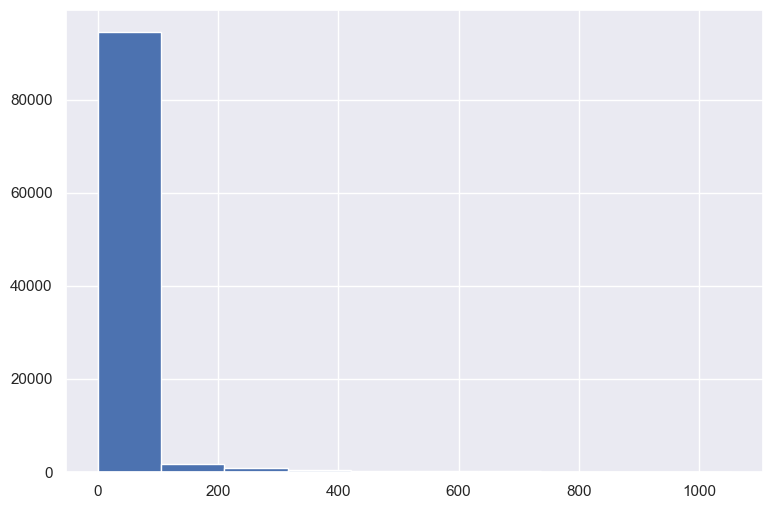

In [88]:
gap_data.hist()

картинка несильно содержательна, поэтому фильтруем по значению временных меток (просто уменьшаем масштаб по сути))

<AxesSubplot: >

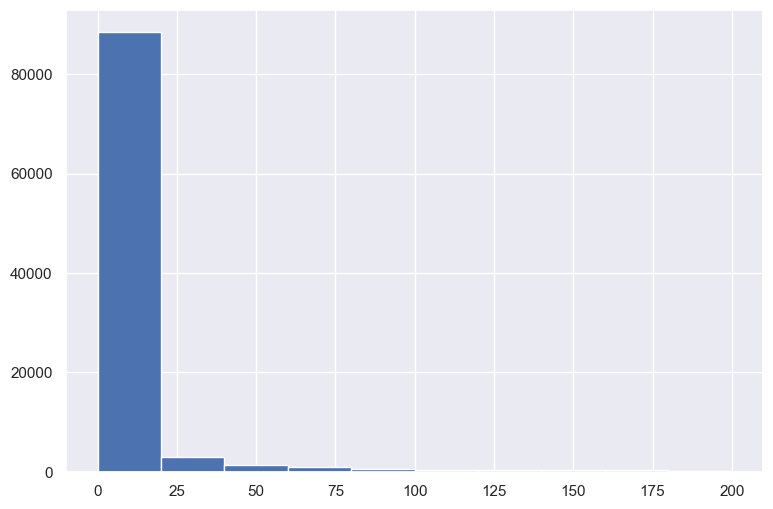

In [89]:
gap_data[gap_data < 200].hist()

видим, что большая часть укладывается в диапазон от 0 до 25 дней (именно столько БОЛЬШАЯ часть пользователей делает перерыв между заходами на сайт и потом ВОЗВРАЩАЕТСЯ)

теперь проверим, какое число дней является пограничным для возврата на сайт для 5% людей.

для этого возьмем квантиль 0.95 для всех значений разниц во времени - это будет означать, что из всей массы наблюдений по переменной (разница между заходом и выходом с сайта) вероятность попасть в дипазон от 0 до n-дней составляет 95%

а именно пограничное значение разницы во времени будет равняться квантилю от 0.95

In [90]:
gap_data.quantile(0.95)         # вернет предельное количество дней, после которого лишь 5% вернется на сайт

59.760440972222156

In [91]:
gap_data.quantile(0.98)         # вернет количество дней, после которого лишь 2% вернется на сайт

179.1959025462963

интересно, какое количество дней является пограничным для половины людей?

то есть вероятность, что человек зашел на сайт, посмотрел материалы и вышел - когда он вернется с 50% вероятностью? 

по сути это шанс 50/50

In [92]:
gap_data.quantile(0.5)          # всего лишь 32 часа стоит ждать. и вероятность снижается с каждым днем (статистически)

1.3154803240740742

Возьмем более щадящий порог для установления характеристики "Покинул курс навсегда":

90% возвращается спустя 18 дней, 10% более чем через 18 дней

In [93]:
gap_data.quantile(0.9)

18.325995370370403

### Отвлечемся - практическая задачка:
найти id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.

In [94]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [95]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


#### Логика рассуждений:
1) Вероятно, преподаватель (создатель) курса находится в числе тех, кто за всю историю курса заходил на этот курс
2) скорее всего, он не только заходит, но снова и снова решает задачи курса, проверяя какие ответы принимает система

посчитаем количество уникальных дней для каждого пользователя в обоих датасэтах:
- группируем по пользователям
- собираем данные из колонки дни - считаем количество для каждого пользователя
- переименовываем результируюущую колонку
- сортируем по убыванию (то есть в шапке будут польлзователи, у которых больше всех число уникальных дней пребывания на сайте)


In [128]:
events_data\
    .groupby('user_id')\
    .agg({'day':'count'})\
        .rename(columns = {'day' : 'num_days'})\
            .sort_values('num_days', ascending=False)\
                .head(10)



,num_days
user_id,
20907,33043
10794,16436
25279,10179
1046,9095
3572,7905
11770,6641
9546,6387
761,4592
8363,3918


In [127]:
submissions_data\
    .groupby('user_id')\
    .agg({'day':'count'})\
        .rename(columns = {'day' : 'num_days'})\
            .sort_values('num_days', ascending=False)\
                .head(10)

,num_days
user_id,
12265,1051
3643,948
1046,934
14454,920
643,888
20236,881
635,853
1468,768
24995,625


смотрим на обе таблицы - пользователь, который присутствует в обеих - под номером 1046

In [150]:
events_data.query("action == 'passed' ").sort_values('step_id', ascending= False)# .query("timestamp == min(events_data.timestamp)")



,step_id,timestamp,action,user_id,date,day
2667878,158433,1509114944,passed,13180,2017-10-27 14:35:44,2017-10-27
3412070,158433,1525197533,passed,15373,2018-05-01 17:58:53,2018-05-01
1907497,158433,1488890498,passed,15523,2017-03-07 12:41:38,2017-03-07
2889905,158433,1514911414,passed,4437,2018-01-02 16:43:34,2018-01-02
3180218,158433,1521053314,passed,3445,2018-03-14 18:48:34,2018-03-14
...,...,...,...,...,...,...
260396,30456,1435593417,passed,17632,2015-06-29 15:56:57,2015-06-29
3184398,30456,1521124627,passed,11348,2018-03-15 14:37:07,2018-03-15
2854233,30456,1513937537,passed,4451,2017-12-22 10:12:17,2017-12-22
556721,30456,1436809182,passed,6496,2015-07-13 17:39:42,2015-07-13


In [ ]:
.loc['action'=='passed']